# LA POULE QUI CHANTE 

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px


In [2]:
sns.set()

## Chargement des données nettoyées

In [3]:
DF_clustering = pd.read_csv('DF_clustering.csv', index_col='Zone')

DF_clustering_log = pd.read_csv('DF_clustering_log.csv', index_col='Zone')

ref_pays = pd.read_csv('ref_pays.csv')

In [4]:
ref_pays

,Code zone str,Zone,Code zone num
0,AFG,Afghanistan,2
1,ZAF,Afrique du Sud,202
2,ALB,Albanie,3
3,DZA,Algérie,4
4,DEU,Allemagne,79
...,...,...,...
230,VEN,Venezuela,236
231,VNM,Viet Nam,237
232,YEM,Yémen,249
233,ZMB,Zambie,251


In [5]:
DF_clustering

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80
Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28
Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38
Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59
...,...,...,...,...,...,...,...,...
Vanuatu,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70
Viet Nam,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23
Yémen,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94


In [6]:
DF_clustering_log

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,3.367296,3.401197,0.000000,10.499493,9.839187,5590.3810,-2.80
Afrique du Sud,35.69,7.419381,6.244167,4.158883,10.950995,12.851735,9353.5520,-0.28
Albanie,16.36,2.639057,3.663562,0.000000,7.967339,9.474298,1603.5340,0.38
Algérie,6.38,5.620401,1.098612,0.000000,10.630799,12.044130,1340.3900,-0.92
Allemagne,19.47,7.323171,6.736967,6.472346,11.322484,15.121367,439.8984,0.59
...,...,...,...,...,...,...,...,...
Vanuatu,11.66,0.693147,1.609438,0.000000,5.657773,6.781126,16346.3500,0.70
Viet Nam,12.33,6.823286,5.676754,0.693147,11.457430,12.547371,9208.5540,0.23
Yémen,8.53,5.129899,4.369448,0.000000,10.234079,10.197769,5317.2610,-2.94


## Etude de marché

### Évaluation de la corrélation entre les variables


On va évaluer la corrélation entre nos variables a l'aide d'une matrice de corrélation

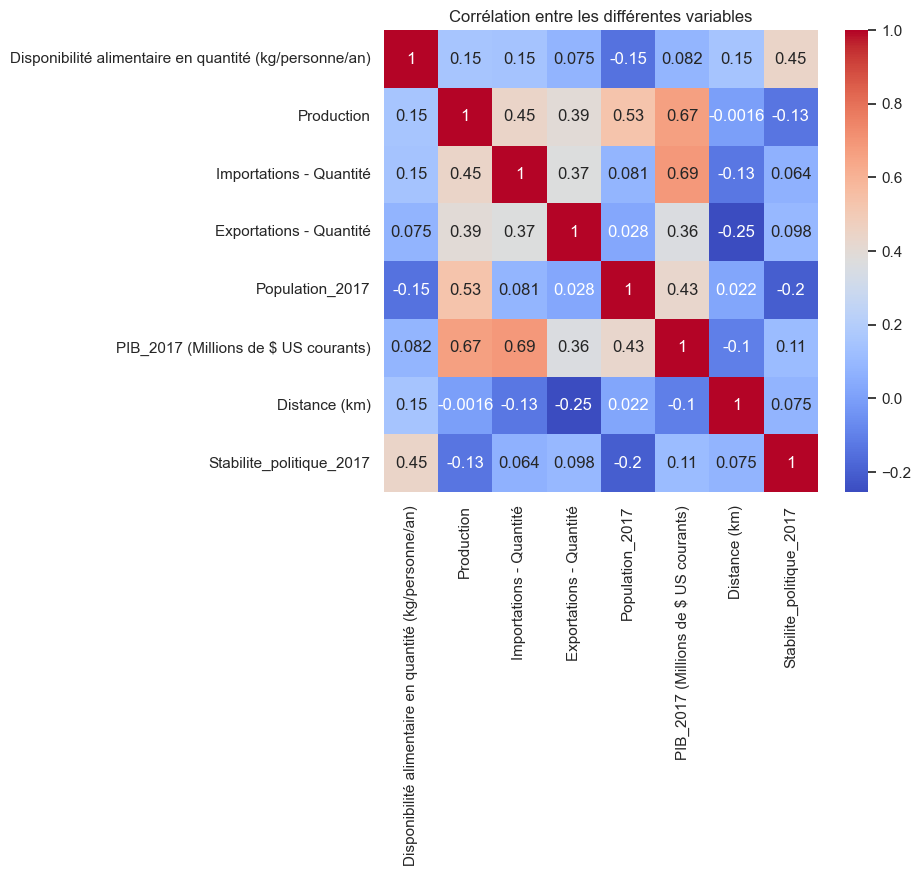

In [7]:
Kpi_corr = plt.figure(figsize=(7, 6))
Kpi_corr = sns.heatmap(DF_clustering.corr(),cmap="coolwarm",annot=True)
Kpi_corr = plt.title('Corrélation entre les différentes variables')
Kpi_corr = plt.savefig('CORRELATION DES VARIABLES ENTRE ELLES.jpg')
plt.show(Kpi_corr)

Constat : 
- La production est fortement corrélée avec le PIB : le pays producteur de volaille ont tendance a etre des pays riches. 

- La population semble avoir trois corrélations négatives : 
    - Avec la disponibilité alimentaire (plus il y a d'habitants, plus il est difficile d'avoir un important volume de dispo alimentaire)
    - Avec la variation de stocks : Plus le pays est fortement peuplé plus les stocks varient a cause de la consommation
    - Avec la stabilité politique

- La production et l'exportation sont également fortement corrélées : Pour pouvoir exporter en grande quantités il faut produire en grande quantités

- La production et la population sont également corrélés : plus un pays a d'habitants plus il produit

### Réalisation d'une ACP sur nos données primaires

In [8]:
DF_clustering.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80
Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28
Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38
Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59


##### Centrage et reduction des données

In [9]:
X = DF_clustering_log.values
X[:5]

array([[ 1.53000000e+00,  3.36729583e+00,  3.40119738e+00,
         0.00000000e+00,  1.04994935e+01,  9.83918687e+00,
         5.59038100e+03, -2.80000000e+00],
       [ 3.56900000e+01,  7.41938058e+00,  6.24416690e+00,
         4.15888308e+00,  1.09509952e+01,  1.28517346e+01,
         9.35355200e+03, -2.80000000e-01],
       [ 1.63600000e+01,  2.63905733e+00,  3.66356165e+00,
         0.00000000e+00,  7.96733876e+00,  9.47429798e+00,
         1.60353400e+03,  3.80000000e-01],
       [ 6.38000000e+00,  5.62040087e+00,  1.09861229e+00,
         0.00000000e+00,  1.06307992e+01,  1.20441300e+01,
         1.34039000e+03, -9.20000000e-01],
       [ 1.94700000e+01,  7.32317072e+00,  6.73696696e+00,
         6.47234629e+00,  1.13224839e+01,  1.51213674e+01,
         4.39898400e+02,  5.90000000e-01]])

In [10]:
X.shape

(165, 8)

In [11]:
#on enregistre nos pays dans une variable
pays = DF_clustering_log.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe'],
      dtype='object', name='Zone', length=165)

In [12]:
features = DF_clustering_log.columns
features

Index(['Disponibilité alimentaire en quantité (kg/personne/an)', 'Production',
       'Importations - Quantité', 'Exportations - Quantité', 'Population_2017',
       'PIB_2017 (Millions de $ US courants)', 'Distance (km)',
       'Stabilite_politique_2017'],
      dtype='object')

In [13]:
# on initie le standard scaler
scaler = StandardScaler()
#on fit
scaler.fit(X)
#on transforme
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-1.17860154, -0.31257289,  0.28843617, -0.72683805,  0.84461366,
        -0.3888143 , -0.09107616, -3.05069452],
       [ 1.03602817,  1.45620444,  1.8194633 ,  1.37082451,  1.08362213,
         1.03871034,  0.85778033, -0.24413926],
       [-0.21715661, -0.63045661,  0.42972745, -0.72683805, -0.49581625,
        -0.5617204 , -1.09633095,  0.49091093],
       [-0.8641708 ,  0.670931  , -0.9515772 , -0.72683805,  0.91412206,
         0.65601915, -1.16268081, -0.9569152 ],
       [-0.01553196,  1.41420783,  2.08485139,  2.53769193,  1.28027464,
         2.11419764, -1.38973329,  0.72479053]])

In [14]:
#on vérifie la moyenne et l'écart type
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx,:]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


On va travailler sur 4 composantes

In [15]:
n_components = 4

In [16]:
pca = PCA(n_components=n_components)

In [17]:
pca.fit(X_scaled)

PCA(n_components=4)

In [18]:
#on observe la variance captée par chaque nouvelle composante
pca.explained_variance_ratio_.round(3)

array([0.425, 0.248, 0.129, 0.074])

In [19]:
# on stocke cette information dans une variable
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([42.46, 24.83, 12.86,  7.41])

In [20]:
#on observe la somme cumulée des variances captées par nos variables
scree_cum = scree.cumsum().round()
scree_cum

array([42., 67., 80., 88.])

In [21]:
#on défini une variable avec la liste de nos composants
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

##### Eboulis des valeurs propres

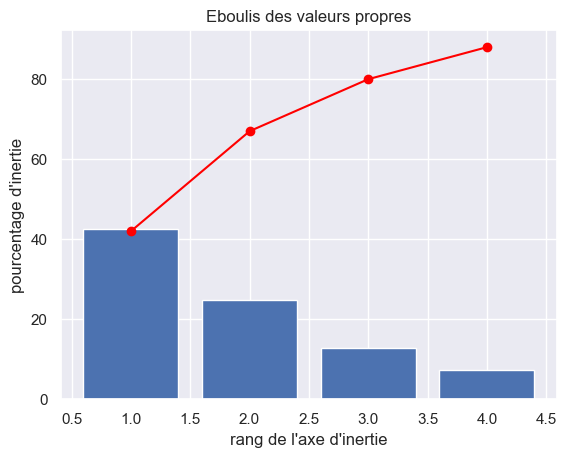

In [22]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On capte presque 80% de la variance avec les 4 premières composantes et quasiment 100%  lorsqu'on cumule la variance de nos 6 composantes

##### Calcul des composantes

In [23]:
pcs = pca.components_
pcs

array([[-0.00872546,  0.49036446,  0.29131104,  0.41193138,  0.44132519,
         0.50520143, -0.21253333, -0.09874287],
       [-0.56269672,  0.04412915, -0.33605944, -0.31158951,  0.36506971,
        -0.03463463,  0.00577593, -0.58042418],
       [ 0.3209284 ,  0.28530174, -0.22411343, -0.08765088,  0.15958685,
         0.14242235,  0.84367871, -0.01234976],
       [ 0.08368778, -0.13257887,  0.81911523, -0.22468083,  0.02177516,
        -0.1653056 ,  0.22489767, -0.41905716]])

In [24]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,-0.008725,0.490364,0.291311,0.411931,0.441325,0.505201,-0.212533,-0.098743
1,-0.562697,0.044129,-0.336059,-0.311590,0.365070,-0.034635,0.005776,-0.580424
2,0.320928,0.285302,-0.224113,-0.087651,0.159587,0.142422,0.843679,-0.012350
3,0.083688,-0.132579,0.819115,-0.224681,0.021775,-0.165306,0.224898,-0.419057


In [25]:

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(3)

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
F1,-0.009,0.490,0.291,0.412,0.441,0.505,-0.213,-0.099
F2,-0.563,0.044,-0.336,-0.312,0.365,-0.035,0.006,-0.580
F3,0.321,0.285,-0.224,-0.088,0.160,0.142,0.844,-0.012
F4,0.084,-0.133,0.819,-0.225,0.022,-0.165,0.225,-0.419


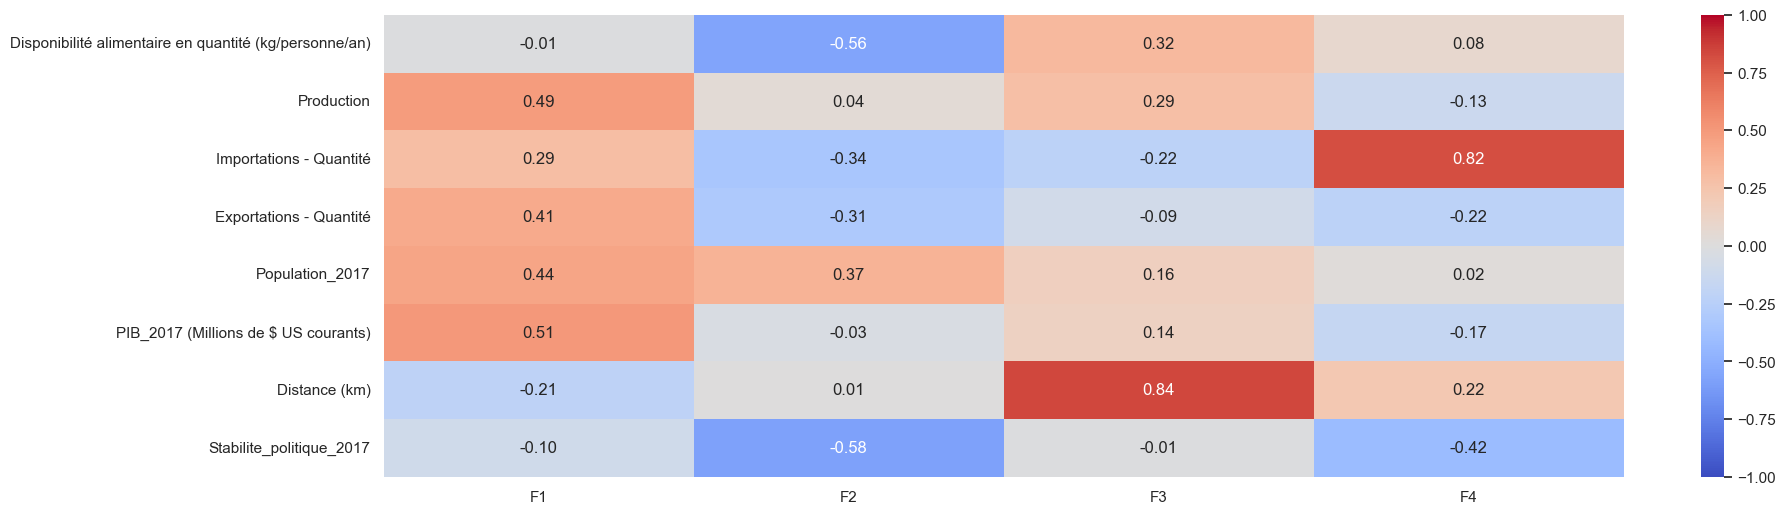

In [26]:
# on va venir analyser les corrélations entre nos dimensions d'origine et les composantes déterminées par l'ACP
fig, ax = plt.subplots(figsize=(20, 6))
heatmap = sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show(heatmap) 

##### Graph de corrélation

Afin d'avoir une meilleur compréhension des corrélations entre nos dimensions et nos composantes principales, nous allons construire plusieurs graphiques de corrélations :

In [27]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 6))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

F1 et F2

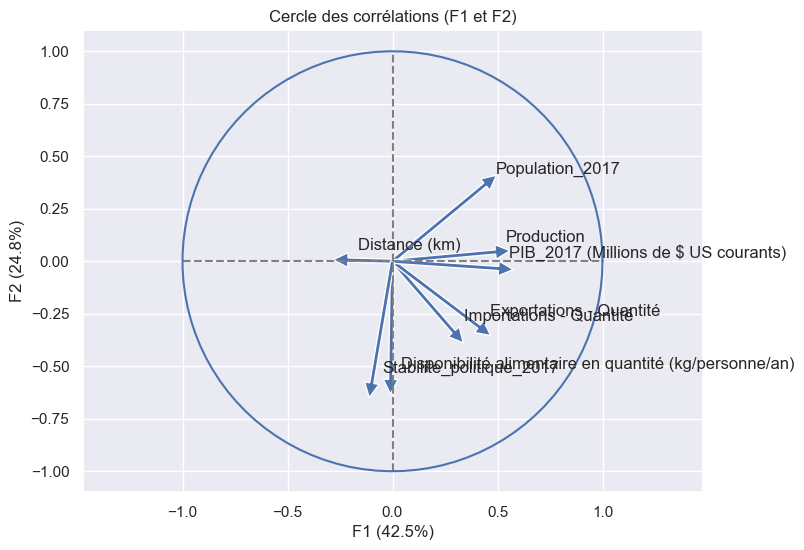

In [28]:
correlation_graph(pca, (0,1), features)

1ère composante:
- contribution positive: Population, Production, PIB, Exportations et Importations
- contribution négative: Distance

2ème composante:
- contribution positive: Population
- contribution négative: Stabilité politique, dispo alimentaire, importation, exportation

F2 et F3

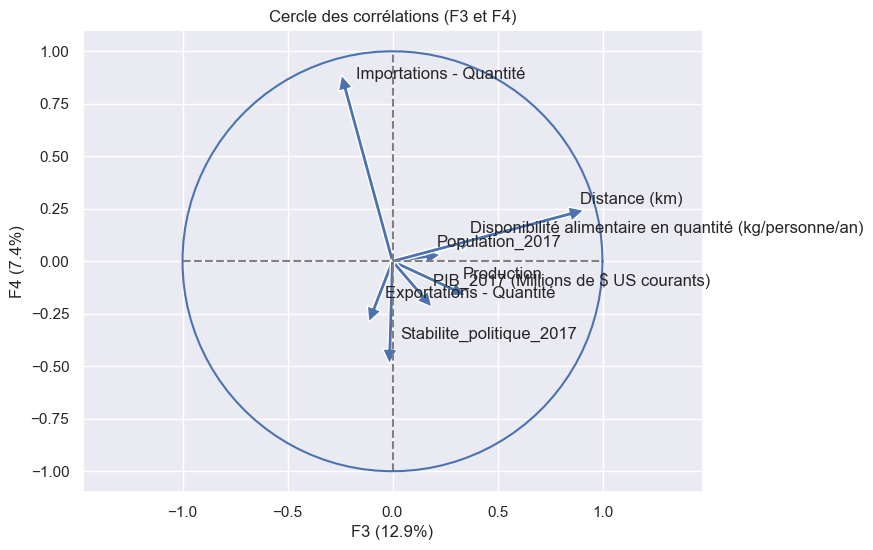

In [29]:
correlation_graph(pca, (2,3), features)

3eme composante:
- contribution positive: Distance, disponibilité alimentaire, production
- contribution négative: Aucune

4eme composante:
- contribution positive: importation
- contribution négative: Stabilité politique, Exportation

##### Projection des individus

On va également projeter nos individus sur ces deux nouveaux plans factoriels afin de comprendre comment ils se positionnent face a ces composantes

In [30]:
x_y = (0,1)

In [31]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 0.13853725,  2.87092519, -0.42810902,  1.68297239],
       [ 2.64453427, -1.05100987,  1.26760185,  1.22310557],
       [-0.79954702, -0.27638848, -1.37230279,  0.21049179],
       [ 0.83637255,  1.92183375, -0.53874768, -0.72643715],
       [ 4.2032178 , -1.45475253, -0.96719822,  0.0108819 ]])

In [32]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[8,6], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

F1 et F2

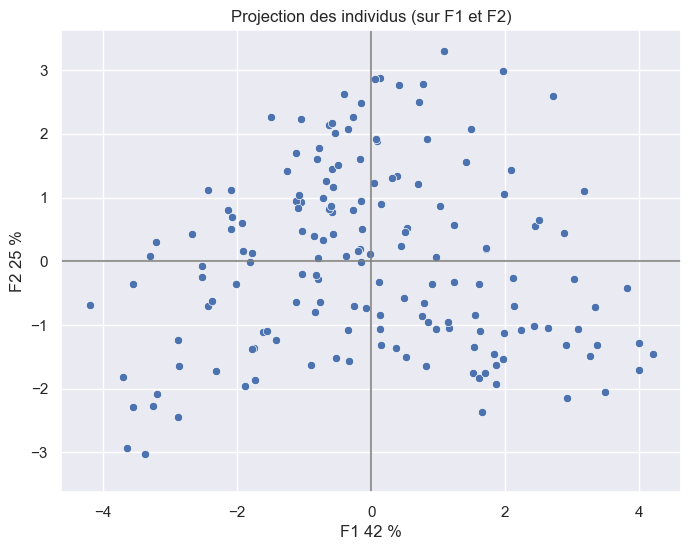

In [33]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y,pca)

F2 et F3

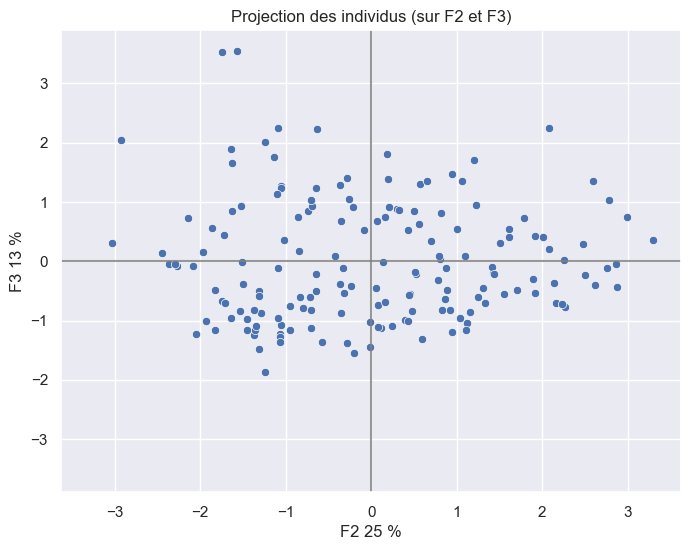

In [34]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca)

On va conserver le resultat de notre ACP afin de l'exploiter par la suite dans le cadre de l'analyse des différents clusters que nous allons produire !

### Clustering

Face à la taille de notre échantillon de pays et au nombre de dimensions sélectionnées, nous allons devoir procéder à un travail de regroupement afin de pouvoir réaliser notre étude de marché

L’objectif va être de rapprocher les pays présentant le plus de similarités dans des groupes distincts afin de pouvoir ensuite travailler sur des groupes plutôt que sur des individus. 

Pour ce faire nous allons utiliser et comparer les résultats de deux méthodes de clustering : 

- La classifications Ascendante Hierarchique

- Le K-means

### Classification ascendate hierarchique

On va réutiliser nos données centrées réduites générées a l'occasion de notre ACP afin de réaliser notre CAH :

In [35]:
X
X_scaled

array([[-1.17860154, -0.31257289,  0.28843617, ..., -0.3888143 ,
        -0.09107616, -3.05069452],
       [ 1.03602817,  1.45620444,  1.8194633 , ...,  1.03871034,
         0.85778033, -0.24413926],
       [-0.21715661, -0.63045661,  0.42972745, ..., -0.5617204 ,
        -1.09633095,  0.49091093],
       ...,
       [-0.72478397,  0.45682168,  0.80986904, ..., -0.21889675,
        -0.1599414 , -3.20661426],
       [-1.05607079, -0.07479379, -0.16190928, ..., -0.23631197,
         0.41685543,  0.23475708],
       [-0.97438363,  0.07207986, -0.49528106, ..., -0.41929992,
         0.5038031 , -0.72303559]])

In [36]:
# On va dans un premier temps créer la Matrice des liens necessaires a la realisation de la CAH selon la Méthode de Ward (méthode la plus répandue)
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

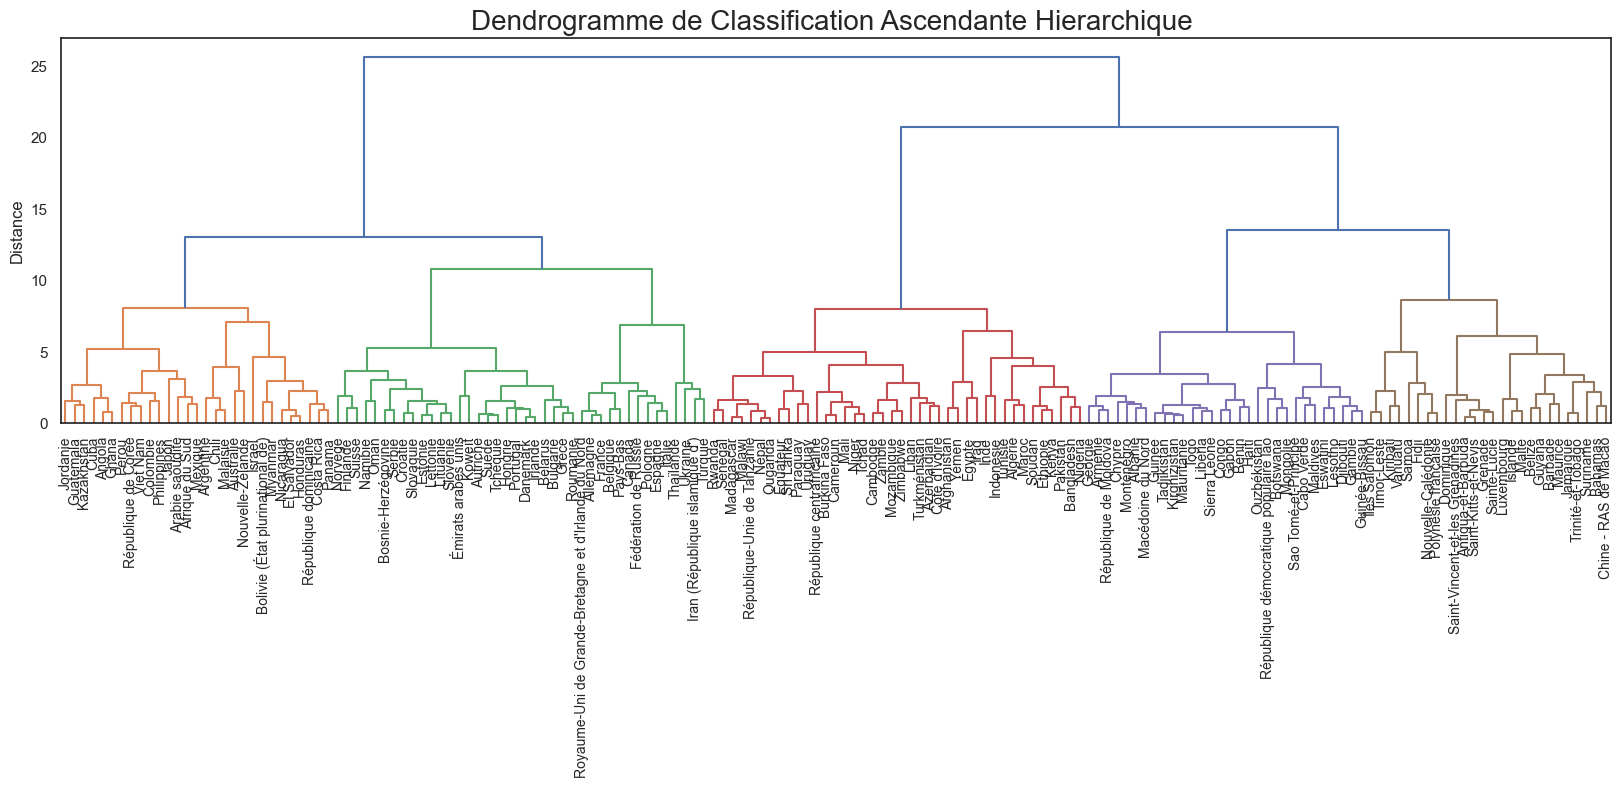

In [37]:
#par la suite on va venir produire un dendrogramme sur notre matrice de liens afin de visualiser les clusters
fig =plt.figure(figsize=(20,5))
sns.set_style('white')
plt.title('Dendrogramme de Classification Ascendante Hierarchique ', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = DF_clustering_log.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.show()

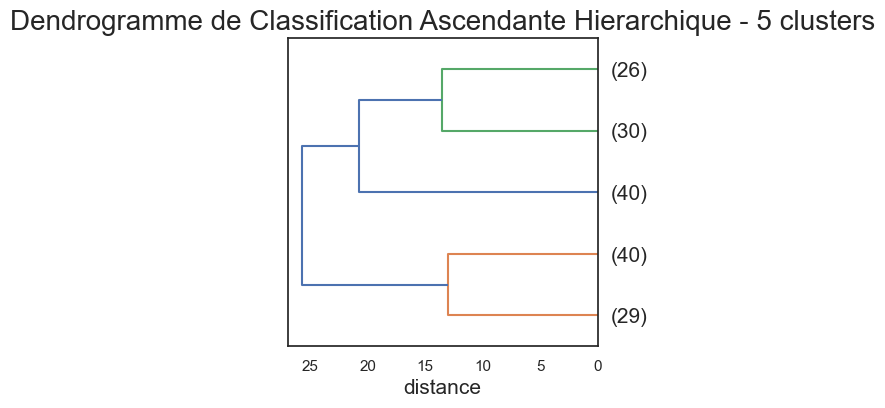

In [38]:
# on va ensuite venir afficher ce dendrogramme de manière horizontale afin de s'assurer que les clusters sont a peu près équilibrés
fig = plt.figure(figsize=(4,4))
plt.title('Dendrogramme de Classification Ascendante Hierarchique - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
# on va tester sur un découpage en 5 clusters, qui semble naturellement se détacher de notre dendrogramme initial
dendrogram(Z, labels = DF_clustering_log.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

#### Analyse des clusters générés avec la CAH

In [39]:
# on va créer de nouveaux DF afin de stocker l'information des clusters 
DF_clustering_cah = DF_clustering.copy()
DF_clustering_log_cah = DF_clustering_log.copy()

In [40]:
# on va stocker dans une variable l'appartenance de chacun de nos pays au différents clusters
clusters_cah = fcluster(Z, 5, criterion='maxclust')

# puis on va l'appliquer a nos différents DF:

# le DF originel :
DF_clustering_cah['Cluster_cah'] = clusters_cah

# le DF retravaillé avec normalisation par le log
DF_clustering_log_cah['Cluster_cah'] = clusters_cah

# le  DF retravaillé avec normalisation par le log et par le centrage et réduction
DF_clustering_log_fit_cah = pd.DataFrame(X_scaled)
DF_clustering_log_fit_cah['Cluster_cah'] = clusters_cah

clusters_df_cah = pd.DataFrame(index=np.unique(clusters_cah), columns=['Pays'])
for cluster_id in np.unique(clusters_cah):
    countries = DF_clustering_cah[DF_clustering_cah['Cluster_cah'] == cluster_id].index.tolist()
    clusters_df_cah.at[cluster_id, 'Pays'] = ', '.join(countries)

clusters_df_cah['Cluster_cah'] = clusters_df_cah.index
clusters_df = clusters_df_cah.reset_index(drop=True)

clusters_df_cah

,Pays,Cluster_cah
1,"Afrique du Sud, Angola, Arabie saoudite, Argen...",1
2,"Allemagne, Autriche, Bélarus, Belgique, Bosnie...",2
3,"Afghanistan, Algérie, Azerbaïdjan, Bangladesh,...",3
4,"Albanie, Arménie, Bénin, Botswana, Cabo Verde,...",4
5,"Antigua-et-Barbuda, Bahamas, Barbade, Belize, ...",5


On va ensuite afficher la liste des pays de chaque clusters avec leurs données pour 2017 :

In [41]:
# Cluster 1
cluster_1=DF_clustering_cah.loc[DF_clustering_cah['Cluster_cah']==1]
cluster_1.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_cah
Zone,,,,,,,,,
Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.552,-0.28,1
Angola,10.56,42.0,277.0,0.0,29816.766,73690.16,6510.322,-0.38,1
Arabie saoudite,43.36,616.0,722.0,10.0,33101.179,714994.69,4694.500,-0.64,1
Argentine,42.24,2161.0,8.0,207.0,43937.140,643628.39,11072.250,0.17,1
Australie,47.65,1269.0,16.0,42.0,24584.620,1326882.10,16975.460,0.90,1


In [42]:
# Cluster 2
cluster_2=DF_clustering_cah.loc[DF_clustering_cah['Cluster_cah']==2]
cluster_2.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_cah
Zone,,,,,,,,,
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59,2
Autriche,18.20,148.0,110.0,78.0,8819.901,417261.15,1035.1440,1.05,2
Bélarus,27.98,463.0,21.0,152.0,9450.231,54725.30,1823.7090,-0.05,2
Belgique,12.65,463.0,338.0,656.0,11419.748,502764.72,262.3845,0.43,2
Bosnie-Herzégovine,16.70,61.0,10.0,8.0,3351.525,18326.37,1352.4630,-0.35,2


In [43]:
# Cluster 3
cluster_3=DF_clustering_cah.loc[DF_clustering_cah['Cluster_cah']==3]
cluster_3.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_cah
Zone,,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.381,-2.80,3
Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.390,-0.92,3
Azerbaïdjan,13.11,104.0,27.0,0.0,9845.320,40866.63,3817.547,-0.75,3
Bangladesh,1.50,249.0,0.0,0.0,159685.424,293754.78,7916.790,-1.26,3
Burkina Faso,2.27,46.0,0.0,0.0,19193.234,14106.96,4082.870,-0.93,3


In [44]:
# Cluster 4
cluster_4=DF_clustering_cah.loc[DF_clustering_cah['Cluster_cah']==4]
cluster_4.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_cah
Zone,,,,,,,,,
Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.534,0.38,4
Arménie,16.06,11.0,35.0,0.0,2944.791,11527.46,3434.071,-0.62,4
Bénin,14.40,18.0,123.0,0.0,11175.198,12701.66,4726.537,0.03,4
Botswana,3.39,5.0,3.0,0.0,2205.080,16105.16,8522.764,1.02,4
Cabo Verde,17.62,1.0,12.0,0.0,537.498,1996.74,4452.386,0.77,4


In [45]:
# Cluster 5
cluster_5=DF_clustering_cah.loc[DF_clustering_cah['Cluster_cah']==5]
cluster_5.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_cah
Zone,,,,,,,,,
Antigua-et-Barbuda,54.10,0.0,7.0,0.0,95.426,1531.15,6708.770,0.75,5
Bahamas,43.17,6.0,24.0,0.0,381.755,12253.50,7209.450,0.99,5
Barbade,46.78,15.0,2.0,0.0,286.232,4992.30,6882.340,0.97,5
Belize,25.69,20.0,0.0,0.0,375.769,2266.66,8664.439,0.04,5
Chine - RAS de Macao,34.47,3.0,23.0,0.0,622.585,50383.87,9601.923,1.43,5


Affichage la moyenne par clusters pour nos 8 dimensions

In [46]:
means_by_cluster_cah = DF_clustering_cah.groupby('Cluster_cah').mean()
means_by_cluster_cah

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Cluster_cah,,,,,,,,
1,28.283793,848.482759,191.862069,19.793103,35381.494586,482191.650345,8999.794172,-0.057586
2,22.885500,717.825000,150.925000,201.675000,25555.480225,607507.203250,2138.374198,0.387500
3,5.531750,304.725000,20.525000,0.700000,77854.258800,165035.000500,6001.023725,-0.958750
4,10.654667,9.600000,29.166667,0.233333,5070.134633,10532.145333,5149.473467,-0.140667
5,37.520000,14.076923,9.692308,0.269231,556.588962,10276.300385,9267.620781,0.719615


Affichage de la distribution des données de chaque clusters sur nos 8 dimensions

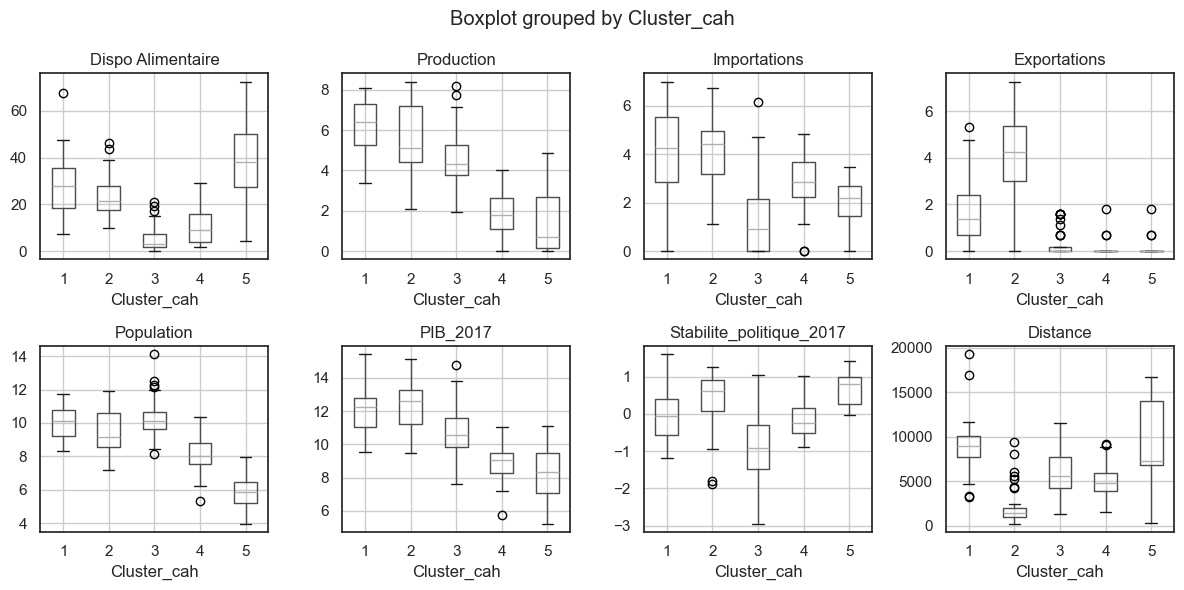

In [47]:
fig, axs = plt.subplots(2, 4,figsize=(12, 6))


DF_clustering_log_cah.boxplot(column='Disponibilité alimentaire en quantité (kg/personne/an)', by='Cluster_cah', ax=axs[0, 0])
axs[0, 0].set_title('Dispo Alimentaire')

DF_clustering_log_cah.boxplot(column='Production', by='Cluster_cah', ax=axs[0, 1])
axs[0, 1].set_title('Production')

DF_clustering_log_cah.boxplot(column='Importations - Quantité', by='Cluster_cah', ax=axs[0, 2])
axs[0, 2].set_title('Importations')

DF_clustering_log_cah.boxplot(column='Exportations - Quantité', by='Cluster_cah', ax=axs[0, 3])
axs[0, 3].set_title('Exportations')

DF_clustering_log_cah.boxplot(column='Population_2017', by='Cluster_cah', ax=axs[1, 0])
axs[1, 0].set_title('Population')

DF_clustering_log_cah.boxplot(column='PIB_2017 (Millions de $ US courants)', by='Cluster_cah', ax=axs[1, 1])
axs[1, 1].set_title('PIB_2017')

DF_clustering_log_cah.boxplot(column='Stabilite_politique_2017', by='Cluster_cah', ax=axs[1, 2])
axs[1, 2].set_title('Stabilite_politique_2017')

DF_clustering_log_cah.boxplot(column='Distance (km)', by='Cluster_cah', ax=axs[1, 3])
axs[1, 3].set_title('Distance')

plt.tight_layout()
plt.show()

Projection du resultat de notre clustering sur les composantes de notre ACP : 

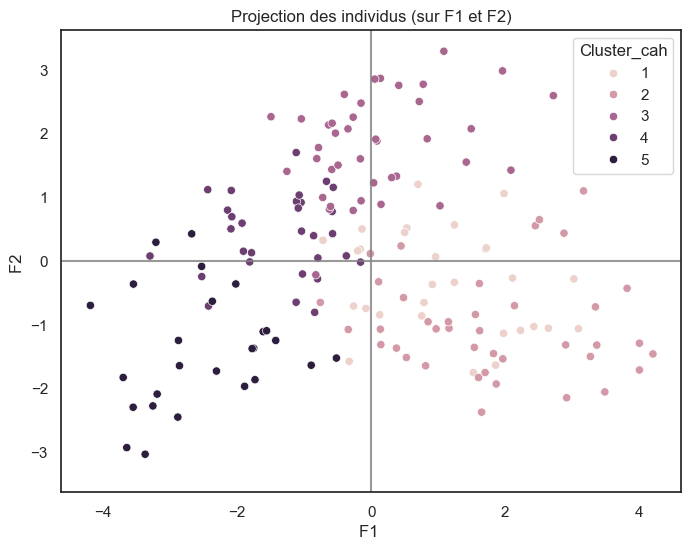

In [48]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=DF_clustering_cah['Cluster_cah'])

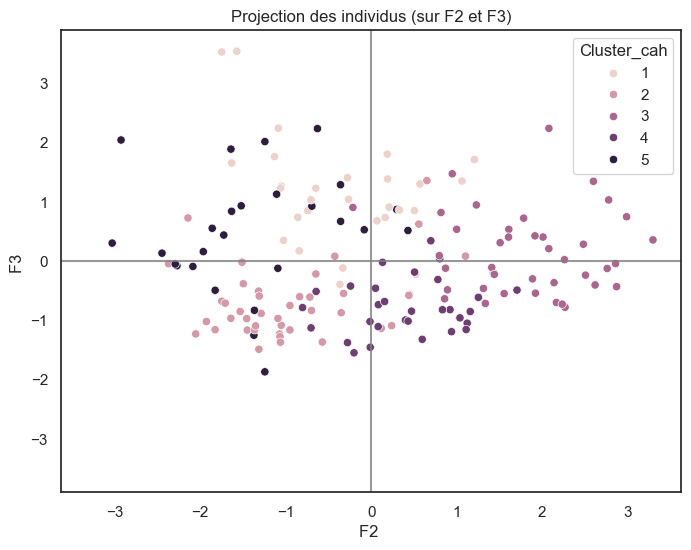

In [49]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, clusters=DF_clustering_cah['Cluster_cah'])

Projection du resultat de notre clustering sur nos deux composantes principales avec ajout des centroïdes

C:\Users\Armel\AppData\Local\Temp\ipykernel_2128\3396393596.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('rocket', len(unique_labels))


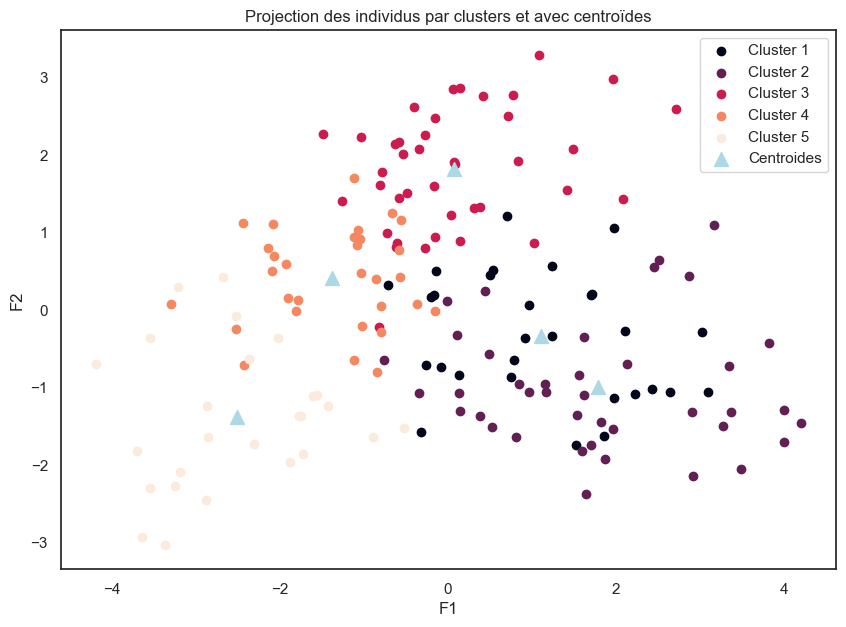

In [50]:
def calculate_centroids(X, labels):
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        centroid = np.mean(X[labels == label], axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def plot_clusters(X, labels, centroids):
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('rocket', len(unique_labels))
    
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(unique_labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], color=colors(i),
                    label=f'Cluster {label}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=100, color='lightblue', label='Centroides')
    
    
    plt.legend()
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Projection des individus par clusters et avec centroïdes')

    plt.show()

centroids = calculate_centroids(X_proj, DF_clustering_cah['Cluster_cah'])

plot_clusters(X_proj, DF_clustering_cah['Cluster_cah'], centroids)


après avoir affiché les centroides de nos différents clusters et en s'aidant pour l'analyse de notre cercle des corrélations, il semblerait que : 
- Les clusters 1, 2 et 3 soient positivement corrélé a F1, dimension elle même corrélée a la stabilité politique, la disponibilité alimentaire et a l'importation
- Le cluster 2 est positivement corrélé a F2, dimension elle même corrélée a la production au PIB et a la population*
- Le cluster 4 est quant lui neutre concernant F1 et le plus corrélé négativement concernant F2
- Le cluster 5 est lui  corellé négativement sur F1 et F2


In [51]:
DF_clustering_iso = DF_clustering_cah.merge(ref_pays,  left_index=True, right_on="Zone")
DF_clustering_iso

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_cah,Code zone str,Zone,Code zone num
0,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80,3,AFG,Afghanistan,2
1,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28,1,ZAF,Afrique du Sud,202
2,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38,4,ALB,Albanie,3
3,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92,3,DZA,Algérie,4
4,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59,2,DEU,Allemagne,79
...,...,...,...,...,...,...,...,...,...,...,...,...
229,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70,5,VUT,Vanuatu,155
231,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23,1,VNM,Viet Nam,237
232,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94,3,YEM,Yémen,249
233,3.42,49.0,12.0,1.0,16853.599,25873.60,7604.8410,0.15,3,ZMB,Zambie,251


Affichage supplémentaire de nos clusters sur une carte du monde : 

In [52]:
fig = px.choropleth(DF_clustering_iso, locations="Code zone str",
                    color="Cluster_cah",
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(showlegend=False)
fig.show()

### Méthode du k-means

Contrairement a la CAH, le regroupement via l'utilisation de l'algorithme de K-means nécessite de définir le nombre de clusters sur lequel itérer en amont. 

C'est donc ce que nous allons réaliser dans un premier temps et ce avec deux méthodes : 

- La méthode du coude

- La méthode du score de silhouette

#### La méthode du coude

In [53]:
intertia_list = [ ]

k_list = range(1, 10)

for k in k_list : 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    intertia_list.append(kmeans.inertia_)

In [54]:
intertia_list

[2595362026.640499,
 927705324.5762697,
 423707685.4239514,
 180459979.38527584,
 102314488.2250115,
 88434926.15903811,
 58212340.93485388,
 51392951.430746265,
 38190314.083246924]

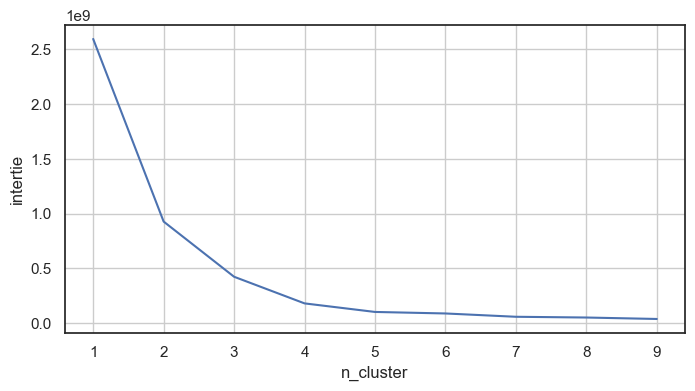

In [55]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia_list)
plt.grid()
plt.show()

La méthode du coude semble suggérer la création de 5 clusters, avec une inertie qui semble se stabailiser a ce chiffre

#### La méthode du coefficient de silhouette

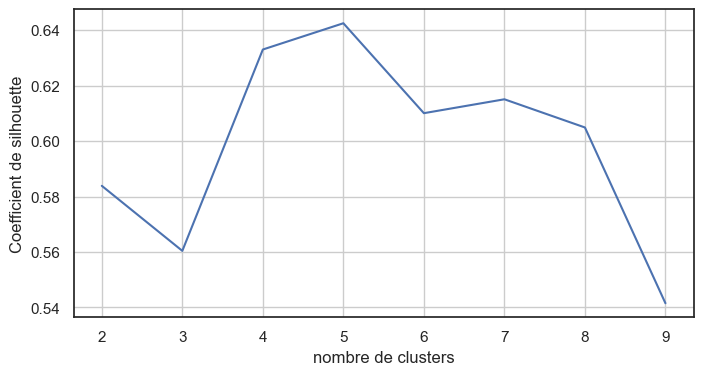

[0.5838552206371644,
 0.5603928778883569,
 0.6330390845687992,
 0.6425170441739281,
 0.6100680541107064,
 0.6150832701021495,
 0.6049098847129624,
 0.5414866619981468]

In [56]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X)
    tab_silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

La méthode du coefficient de silhouette semble confirmer le nombre de clusters : son coefficient est le plus fort a la valeur 5

#### La réalisation du clustering avec K-means

In [57]:
# on va indiquer le nombre clusters souhaités : 5
kmeans = KMeans(n_clusters=5)
# puis on va appliquer le Kmeans a nos données préalablement transformées :
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [58]:
clusters_kmeans = kmeans.labels_
clusters_kmeans

array([3, 1, 4, 3, 1, 2, 0, 1, 1, 4, 1, 1, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2,
       4, 1, 3, 4, 4, 3, 1, 1, 0, 4, 2, 4, 2, 3, 2, 2, 1, 4, 0, 2, 2, 1,
       3, 1, 2, 4, 3, 1, 0, 2, 1, 4, 4, 2, 2, 1, 0, 2, 4, 4, 0, 4, 2, 1,
       4, 3, 3, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2, 3, 4, 0, 2, 4, 2, 3, 4, 1,
       4, 4, 3, 1, 3, 4, 3, 4, 3, 0, 4, 1, 4, 4, 3, 3, 4, 3, 2, 3, 3, 2,
       0, 0, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 0, 1, 4, 1, 4, 4, 2, 3, 1, 1,
       3, 0, 0, 0, 0, 4, 3, 2, 4, 2, 2, 3, 3, 1, 2, 0, 4, 3, 1, 1, 4, 4,
       0, 3, 4, 1, 1, 4, 0, 2, 3, 2, 3])

In [59]:
# on va créer de nouveaux DF afin de stocker l'information des clusters 
DF_clustering_kmeans = DF_clustering.copy()
DF_clustering_log_kmeans = DF_clustering_log.copy()

In [60]:
# DF origine
DF_clustering_kmeans['Cluster_kmeans'] = clusters_kmeans

# DF retravaillé avec normalisation par le log
DF_clustering_log_kmeans['Cluster_kmeans'] = clusters_kmeans

# DF retravaillé avec normalisation par le log et par le centrage et réduction
DF_clustering_log_fit_kmeans = pd.DataFrame(X)
DF_clustering_log_fit_kmeans['Cluster_cah'] = clusters_kmeans


In [61]:
# on va afficher nos différents clusters avec les pays qui les composent :
DF_clustering_kmeans.loc[DF_clustering_kmeans['Cluster_kmeans'] == 0,:]
# DF_clustering_kmeans.loc[DF_clustering_kmeans['Cluster_kmeans'] == 1,:]
# DF_clustering_kmeans.loc[DF_clustering_kmeans['Cluster_kmeans'] == 2,:]
# DF_clustering_kmeans.loc[DF_clustering_kmeans['Cluster_kmeans'] == 3,:]
# DF_clustering_kmeans.loc[DF_clustering_kmeans['Cluster_kmeans'] == 4,:]


,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_kmeans
Zone,,,,,,,,,
Antigua-et-Barbuda,54.10,0.0,7.0,0.0,95.426,1531.15,6708.770,0.75,0
Bahamas,43.17,6.0,24.0,0.0,381.755,12253.50,7209.450,0.99,0
Barbade,46.78,15.0,2.0,0.0,286.232,4992.30,6882.340,0.97,0
Belize,25.69,20.0,0.0,0.0,375.769,2266.66,8664.439,0.04,0
Chine - RAS de Macao,34.47,3.0,23.0,0.0,622.585,50383.87,9601.923,1.43,0
Dominique,35.19,0.0,4.0,0.0,71.458,521.55,6826.396,1.20,0
Fidji,28.02,23.0,3.0,0.0,877.459,5353.47,16595.080,0.62,0
Grenade,45.70,1.0,7.0,0.0,110.874,1125.69,7120.287,1.01,0
Guyana,38.34,31.0,0.0,0.0,775.222,4748.17,7320.075,-0.04,0


On va ensuite afficher la moyenne des valeurs de nos dimensions par clusters

In [62]:
means_by_cluster_kmeans = DF_clustering_kmeans.groupby('Cluster_kmeans').mean()
means_by_cluster_kmeans

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Cluster_kmeans,,,,,,,,
0,41.570435,25.391304,9.391304,1.260870,707.139435,17020.667391,9994.486304,0.759130
1,27.128333,1176.833333,254.000000,233.277778,41007.125028,939441.406111,4064.615208,0.242500
2,21.012500,290.666667,89.361111,5.972222,19094.918500,130825.384444,5293.505511,-0.020000
3,5.614412,364.588235,5.264706,0.676471,88500.547912,179412.761176,6026.305000,-1.010000
4,10.333333,9.777778,22.027778,0.500000,3890.884806,12424.458056,5843.121981,-0.032222


On va afficher la répartition de nos pays par dimensions et par clusters : 

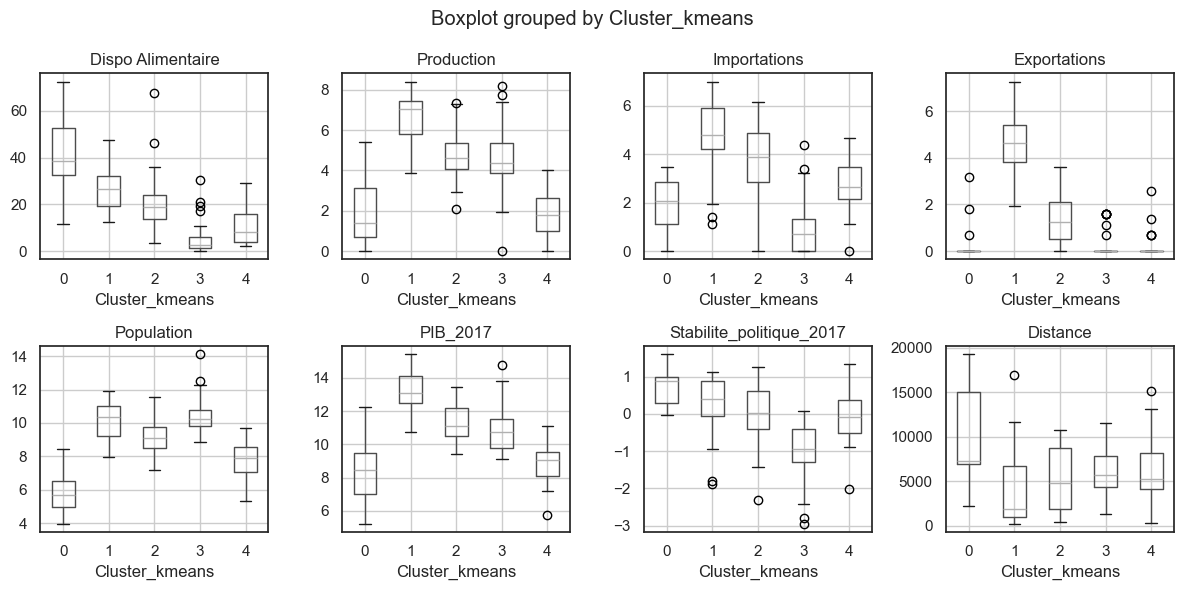

In [63]:
fig, axs = plt.subplots(2, 4,figsize=(12, 6))


DF_clustering_log_kmeans.boxplot(column='Disponibilité alimentaire en quantité (kg/personne/an)', by='Cluster_kmeans', ax=axs[0, 0])
axs[0, 0].set_title('Dispo Alimentaire')

DF_clustering_log_kmeans.boxplot(column='Production', by='Cluster_kmeans', ax=axs[0, 1])
axs[0, 1].set_title('Production')

DF_clustering_log_kmeans.boxplot(column='Importations - Quantité', by='Cluster_kmeans', ax=axs[0, 2])
axs[0, 2].set_title('Importations')

DF_clustering_log_kmeans.boxplot(column='Exportations - Quantité', by='Cluster_kmeans', ax=axs[0, 3])
axs[0, 3].set_title('Exportations')

DF_clustering_log_kmeans.boxplot(column='Population_2017', by='Cluster_kmeans', ax=axs[1, 0])
axs[1, 0].set_title('Population')
DF_clustering_log_kmeans.boxplot(column='PIB_2017 (Millions de $ US courants)', by='Cluster_kmeans', ax=axs[1, 1])
axs[1, 1].set_title('PIB_2017')

DF_clustering_log_kmeans.boxplot(column='Stabilite_politique_2017', by='Cluster_kmeans', ax=axs[1, 2])
axs[1, 2].set_title('Stabilite_politique_2017')

DF_clustering_log_kmeans.boxplot(column='Distance (km)', by='Cluster_kmeans', ax=axs[1, 3])
axs[1, 3].set_title('Distance')

plt.tight_layout()
plt.show()

On projeter le resultat de notre clustering sur les composantes de notre ACP : 

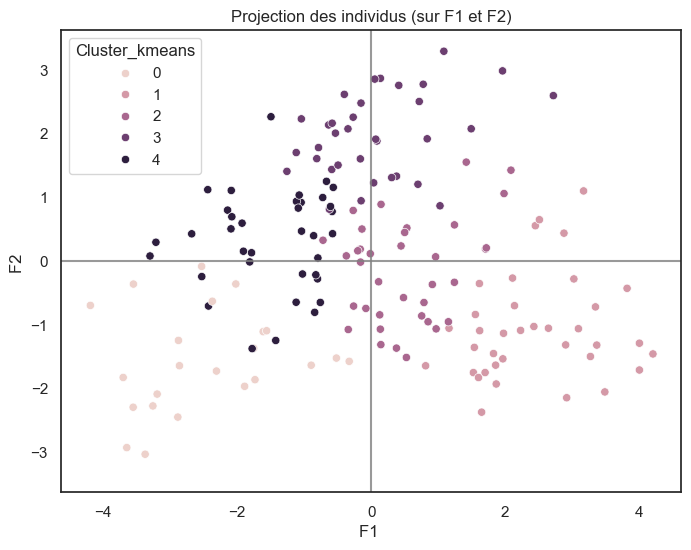

In [64]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=DF_clustering_kmeans['Cluster_kmeans'])

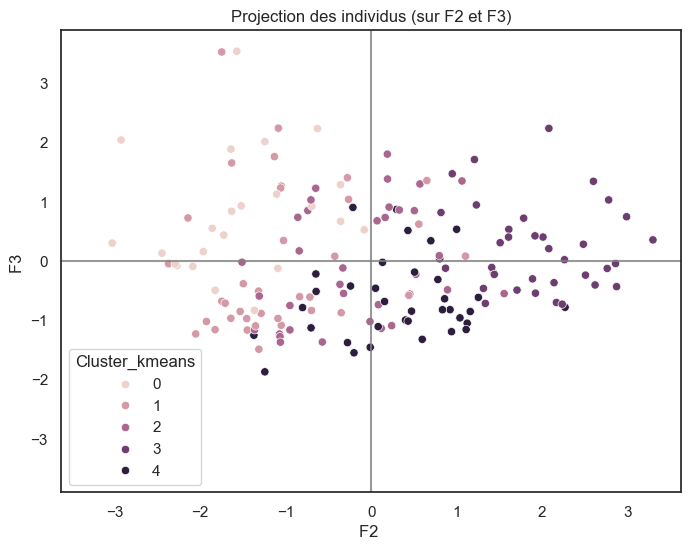

In [65]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, clusters=DF_clustering_kmeans['Cluster_kmeans'])

On va également afficher les centroïdes : 

C:\Users\Armel\AppData\Local\Temp\ipykernel_2128\3752686929.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



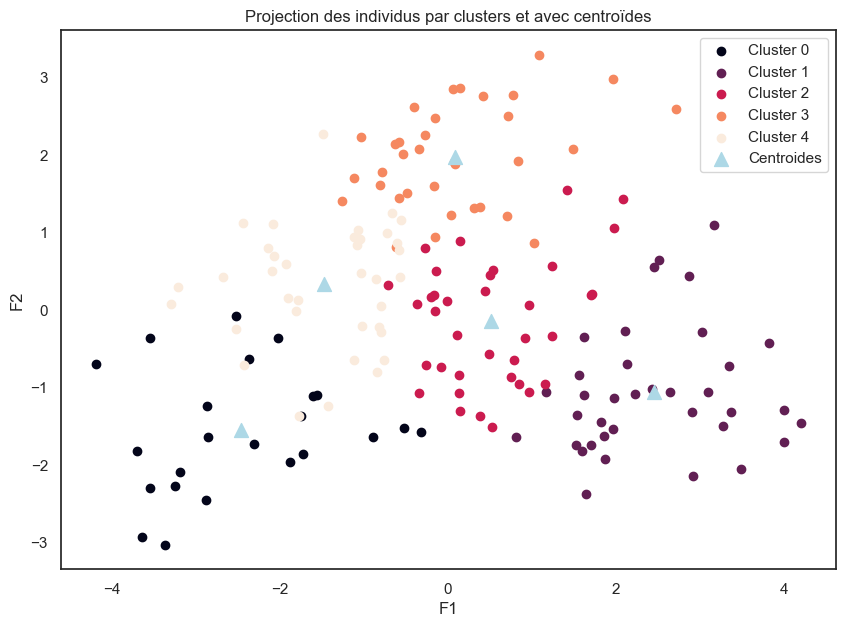

In [72]:
def calculate_centroids(X, labels):
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        centroid = np.mean(X[labels == label], axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def plot_clusters(X, labels, centroids):
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('rocket', len(unique_labels))
    
    plt.figure(figsize=(10, 7))
    for i, label in enumerate(unique_labels):
        plt.scatter(X[labels == label, 0], X[labels == label, 1], color=colors(i),
                    label=f'Cluster {label}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=100, color='lightblue', label='Centroides')
    
    
    plt.legend()
    plt.xlabel('F1')
    plt.ylabel('F2')
    plt.title('Projection des individus par clusters et avec centroïdes')

    plt.show()

centroids = calculate_centroids(X_proj, DF_clustering_kmeans['Cluster_kmeans'])

plot_clusters(X_proj, DF_clustering_kmeans['Cluster_kmeans'], centroids)


Et enfin on va projeter nos clusters sur une carte du monde : 

In [134]:
DF_clustering_iso_kmeans = DF_clustering_kmeans.merge(ref_pays,  left_index=True, right_on="Zone")
DF_clustering_iso_kmeans

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Cluster_kmeans,Code zone str,Zone,Code zone num
0,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80,3,AFG,Afghanistan,2
1,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28,1,ZAF,Afrique du Sud,202
2,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38,0,ALB,Albanie,3
3,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92,3,DZA,Algérie,4
4,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59,2,DEU,Allemagne,79
...,...,...,...,...,...,...,...,...,...,...,...,...
229,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70,4,VUT,Vanuatu,155
231,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23,1,VNM,Viet Nam,237
232,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94,3,YEM,Yémen,249
233,3.42,49.0,12.0,1.0,16853.599,25873.60,7604.8410,0.15,0,ZMB,Zambie,251


In [135]:
fig = px.choropleth(DF_clustering_iso_kmeans, locations="Code zone str",
                    color="Cluster_kmeans",
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(showlegend=False)
fig.show()

### Comparaison des deux methodes de clustering

La réalisation de la classification ascendante hiérarchique et du K-means nous permet de constater que cinq regroupements de pays se détachent. 

Leur projection sur le plan factoriel issu de notre ACP avec F1 en abscisse et F2 eb ordonnée démontre que les deux méthodes ont produit un résultat plutôt similaire avec nos individus et les centroïdes de leurs clusters respectifs répartis assez clairement autour de nos deux composantes principales. 

Une analyse approfondie via la production de box plots, la comparaison des moyennes ou encore l’affichage des différents clusters sur une carte du monde vient confirmer ce fait, nous décideront donc de nous appuyer sur la CAH pour la suite de notre analyse


### Identification des pays cibles


Nous allons donc exploiter le resultat de notre classification ascendante hierarchique afin de consolider une short list de pays potentiellement intéressant pour une implantation

Afin de déterminer le cluster vers lequel se tourner nous avons procédé par élimination : 

Dans un premier temps on va écarter les clusters 3 et 4 car on souhaite exclusivement exporter notre marchandise vers des pays politiquement stable pour des questions de sécurité des collaborateurs et d’image de marque

Dans un second temps on va écarter le cluster numéro 5 pour trois raisons : 

- On souhaite maîtriser notre impact environnemental en exportant vers des pays relativement proche de la France

- Le poulet étant un produit relativement cher, son bon écoulement nécessite une population financière aisée hors le PIB médian des pays du cluster 5 est le plus faible de la liste

- Enfin on souhaite s'implanter dans des pays à fort potentiel, ce qui nécessite d'avoir une importante population, ce qui n'est pas le cas du cluster 5

Les clusters 1 et 2 remplissent tous nos critères cependant : 

- Le cluster 2 comporte les pays les plus proches de la France 

- Les deux clusters sont des gros producteurs de volaille, cependant le cluster 2 en exporte une bien plus grosse partie et en importe à peu près autant ce qui résulte d'une disponibilité alimentaire plus faible pour la population. 

Cette combinaison de facteur laisse à penser que la meilleur opportunité de marché pour notre produit se trouve dans le cluster 2


In [136]:
DF_clustering

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Afghanistan,1.53,28.0,29.0,0.0,36296.113,18753.46,5590.3810,-2.80
Afrique du Sud,35.69,1667.0,514.0,63.0,57009.756,381448.81,9353.5520,-0.28
Albanie,16.36,13.0,38.0,0.0,2884.169,13019.73,1603.5340,0.38
Algérie,6.38,275.0,2.0,0.0,41389.189,170096.99,1340.3900,-0.92
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59
...,...,...,...,...,...,...,...,...
Vanuatu,11.66,1.0,4.0,0.0,285.510,880.06,16346.3500,0.70
Viet Nam,12.33,918.0,291.0,1.0,94600.648,281353.61,9208.5540,0.23
Yémen,8.53,168.0,78.0,0.0,27834.819,26842.23,5317.2610,-2.94


In [137]:
DFCluster2_log = DF_clustering_log_cah.loc[DF_clustering_log_cah['Cluster_cah'] == 2,['Disponibilité alimentaire en quantité (kg/personne/an)','Production','Importations - Quantité','Exportations - Quantité','Population_2017','PIB_2017 (Millions de $ US courants)','Distance (km)','Stabilite_politique_2017']]
DFCluster2 = DF_clustering_cah.loc[DF_clustering_cah['Cluster_cah'] == 2,['Disponibilité alimentaire en quantité (kg/personne/an)','Production','Importations - Quantité','Exportations - Quantité','Population_2017','PIB_2017 (Millions de $ US courants)','Distance (km)','Stabilite_politique_2017']]

In [138]:
DFCluster2

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017
Zone,,,,,,,,
Allemagne,19.47,1514.0,842.0,646.0,82658.409,3690849.15,439.8984,0.59
Autriche,18.20,148.0,110.0,78.0,8819.901,417261.15,1035.1440,1.05
Bélarus,27.98,463.0,21.0,152.0,9450.231,54725.30,1823.7090,-0.05
Belgique,12.65,463.0,338.0,656.0,11419.748,502764.72,262.3845,0.43
Bosnie-Herzégovine,16.70,61.0,10.0,8.0,3351.525,18326.37,1352.4630,-0.35
Bulgarie,22.06,107.0,108.0,45.0,7102.444,59309.75,1760.7070,0.33
Canada,39.02,1417.0,182.0,163.0,36732.095,1649265.64,6004.6450,1.10
Croatie,10.77,61.0,24.0,17.0,4182.857,56061.68,1081.7620,0.69
Danemark,28.98,173.0,133.0,139.0,5732.274,332121.06,1027.6090,0.87


Suite a notre clustering on isole une liste de 40 pays, on va désormais la filtrer et la trier afin de réduire encore le nombre de pays potentiels pour notre implantation :

1. Stabilité politique : 

Comme expliqué précédemment, la stabilité politique est un critère prépodérant dans le choix de notre future destination d'export, on va donc se séparer de tous les pays ayant un indice de stabilité politique inférieur a 0

In [139]:
DFCluster2 = DFCluster2.loc[DFCluster2['Stabilite_politique_2017'] >= 0,:]

2. Impact écologique :  

L'impact écologique de notre activité est également un critère très important a nos yeux, on va donc se limiter aux pays a moins de 2000 kilomètres de la France

In [140]:
DFCluster2 = DFCluster2.loc[DFCluster2['Distance (km)'] <= 2000,:]

In [141]:
DFCluster2.index.nunique()

27

3. Maturité du marché de la volaille:  

Etant une petite structure domestique souhaitant s'exporter pour la première fois hors de France, on va éviter de viser des pays dont le marché de la volaille est deja très développé afin d'éviter une concurrence trop rude, pour ce faire on va supprimer de notre liste les gros producteurs de volaille.

In [142]:
DFCluster2 = DFCluster2.loc[DFCluster2['Production'] <= 400,:]

On a désormais une liste de 27 pays, afin de pouvoir les départager nous allons utiliser un indicateur supplémentaire qui témoigne du besoin d'un pays concernant l'importation d'un produit, ici ce sera evidemment la viande de volaille : 

- la dépendance aux importations = (Importation / (Production + Importations - Exportations)) *100 (source : https://www.fao.org/3/X9892F/x9892f09.htm)

In [143]:
DFCluster2['Dependance_importations %'] = round((DFCluster2['Importations - Quantité'] / (DFCluster2['Production'] + DFCluster2['Importations - Quantité'] - DFCluster2['Exportations - Quantité']))*100,2)

On va ensuite trier notre liste de pays par ce nouvel indicateur afin de selectionner les 5 pays présentant la plus grande opportunité en matière d'importation de volaille : 

In [144]:
DFCluster2.sort_values(by='Dependance_importations %', ascending=False)

,Disponibilité alimentaire en quantité (kg/personne/an),Production,Importations - Quantité,Exportations - Quantité,Population_2017,PIB_2017 (Millions de $ US courants),Distance (km),Stabilite_politique_2017,Dependance_importations %
Zone,,,,,,,,,
Irlande,25.82,110.0,99.0,93.0,4753.279,337241.81,778.2031,1.00,85.34
Danemark,28.98,173.0,133.0,139.0,5732.274,332121.06,1027.6090,0.87,79.64
Lettonie,20.89,33.0,43.0,20.0,1951.097,30483.81,1704.5980,0.46,76.79
Estonie,21.26,20.0,21.0,11.0,1319.390,26924.39,1859.0910,0.65,70.00
Slovaquie,13.90,71.0,63.0,35.0,5447.900,95649.97,1094.6100,0.91,63.64
Bulgarie,22.06,107.0,108.0,45.0,7102.444,59309.75,1760.7070,0.33,63.53
Autriche,18.20,148.0,110.0,78.0,8819.901,417261.15,1035.1440,1.05,61.11
Lituanie,28.19,118.0,44.0,68.0,2845.414,47758.74,1700.2960,0.78,46.81
Tchéquie,21.96,163.0,116.0,27.0,10641.034,218628.94,884.6105,1.00,46.03


On va donc selectionner les 5 pays suivants  : 

1. Irlande : 
- Dépendance aux importations : 85.34%
- Stabilité politique : 1.00
- Proximité : 778.20 km
- Consommation de volaille : 25.82 kg/personne/an
- Population : 4,753,279


2. Danemark : 
- Dépendance aux importations : 79.64%
- Stabilité politique : 0.87
- Proximité : 1,027.61 km
- Consommation de volaille : 28.98 kg/personne/an
- Population : 5,732,274


3. Lettonie :
- Dépendance aux importations : 76.79%
- Stabilité politique : 0.46
- Proximité : 1,704.60 km
- Consommation de volaille : 20.89 kg/personne/an
- Population : 1,951,097


4. Estonie : 
- Dépendance aux importations : 70.00%
- Stabilité politique : 0.65
- Proximité : 1,859.09 km
- Consommation de volaille : 21.26 kg/personne/an
- Population : 1,319,390


5. Slovaquie :
- Dépendance aux importations : 63.64%
- Stabilité politique : 0.91
- Proximité : 1,094.61 km
- Consommation de volaille : 13.90 kg/personne/an
- Population : 5,447,900


Conclusion

Les cinq pays sélectionnés - Irlande, Danemark, Lettonie, Estonie, et Slovaquie - présentent un fort potentiel pour notre expansion commerciale concernant notre produit qu'est la volaille , avec une forte dépendance aux importations et une concurrence locale est limité. Ces 5 nations font également étant d'un contexte favorable en étant a la fois très stable politiquement, populés, développés économiquement et relativement proche de la France.

En conclusion, ces pays représentent des choix stratégiques pour notre entreprise, offrant un équilibre optimal entre potentiel de marché et conditions favorables.